In [1]:
import pandas as pd
import os

In [2]:
print(os.getcwd())

/Users/nguyentruong/NguyenTruong/Study/LVTN/Codes/nhlcoding-clustering-pipeline/test_files


In [3]:
df = pd.read_csv("../csv/sample_data_v5.csv")

In [4]:
df.head()

,problem_slug,submission_id,student_code,code,score
0,Array_list_1,1290686,2110501,"int buyCar(int* nums, int length, int k) \n{\n...",1.0
1,Array_list_2,1290686,2110501,bool consecutiveOnes(vector<int>& nums) {\n ...,1.0
2,Array_list_3,1290686,2110501,bool consecutiveOnes(vector<int>& nums) {\n ...,1.0
3,Array_list_4,1290686,2110501,bool consecutiveOnes(vector<int>& nums) {\n ...,1.0
4,Array_list_5,1290686,2110501,int equalSumIndex(vector<int>& nums) {\n //...,1.0


In [13]:
filtered_df = df[(df['problem_slug'] == "Recursion_17") & df['score'] == 1] 

In [14]:
filtered_df.shape

(40, 5)

In [10]:
filtered_df.head(10)

,problem_slug,submission_id,student_code,code,score
3535,Queue_7,1454688,2110501,"int numberOfTheWinner(int N, int k) {\n int...",1.0
3544,Queue_7,1455292,2211876,"int numberOfTheWinner(int N, int k) {\n if ...",1.0
3553,Queue_7,1455293,2213298,// iostream and queue are included\n// Hint: U...,1.0
3562,Queue_7,1455294,2210578,"int numberOfTheWinner(int N, int k) {\n queu...",1.0
3571,Queue_7,1455295,2112585,"int numberOfTheWinner(int n, int k) {\n que...",1.0
3580,Queue_7,1455299,2213035,"int numberOfTheWinner(int N, int k) {\n que...",1.0
3596,Queue_7,1455301,2212282,"int numberOfTheWinner(int N, int k) {\n std...",1.0
3605,Queue_7,1455312,2212372,"int numberOfTheWinner(int N, int k) {\n que...",1.0
3616,Queue_7,1455315,2212935,"int numberOfTheWinner(int N, int k) {\n que...",1.0
3625,Queue_7,1455318,2213250,"int numberOfTheWinner(int N, int k) {\n que...",1.0


In [15]:
filtered_df.to_csv("../csv/recursion_17.csv")

# Test

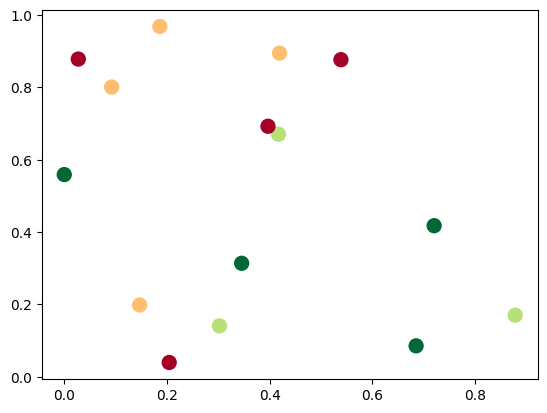

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()